<a href="https://colab.research.google.com/github/djbrady/imagingExamples/blob/main/phaseTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase transfer between two pictures
## David Brady
## University of Arizona
## January 2021

This is a silly notebook exchanging phase between two pictures


## initialization

In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import skimage 
from skimage.transform import resize
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]


In [28]:
!wget https://www.bbvaopenmind.com/wp-content/uploads/2015/06/BBVA-OpenMind-Augusto-Belendez-dennis-gabor-3-1.jpg
!wget https://www.osa.org/osaorg/media/osa.history/ImageGallery/Feinup_James_R_2.jpg

--2021-01-02 20:54:36--  https://www.bbvaopenmind.com/wp-content/uploads/2015/06/BBVA-OpenMind-Augusto-Belendez-dennis-gabor-3-1.jpg
Resolving www.bbvaopenmind.com (www.bbvaopenmind.com)... 65.8.180.71, 65.8.180.68, 65.8.180.37, ...
Connecting to www.bbvaopenmind.com (www.bbvaopenmind.com)|65.8.180.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50384 (49K) [image/jpeg]
Saving to: ‘BBVA-OpenMind-Augusto-Belendez-dennis-gabor-3-1.jpg’

BBVA-OpenMind-Augus 100%[===================>]  49.20K  --.-KB/s    in 0.03s   

2021-01-02 20:54:36 (1.66 MB/s) - ‘BBVA-OpenMind-Augusto-Belendez-dennis-gabor-3-1.jpg’ saved [50384/50384]

--2021-01-02 20:54:36--  https://www.osa.org/osaorg/media/osa.history/ImageGallery/Feinup_James_R_2.jpg
Resolving www.osa.org (www.osa.org)... 65.202.222.43
Connecting to www.osa.org (www.osa.org)|65.202.222.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54562 (53K) [image/jpeg]
Saving to: ‘Feinup_James_R_2.jpg

## get the images

In [40]:
gabor=skimage.io.imread("BBVA-OpenMind-Augusto-Belendez-dennis-gabor-3-1.jpg")
gabor=np.sum(gabor,axis=2)
fienup=skimage.io.imread("Feinup_James_R_2.jpg")
fienup=np.sum(fienup,axis=2)
gabor=gabor[:,(570-340):]
gabor=resize(gabor,(256,256))
fienup=resize(fienup,(256,256))

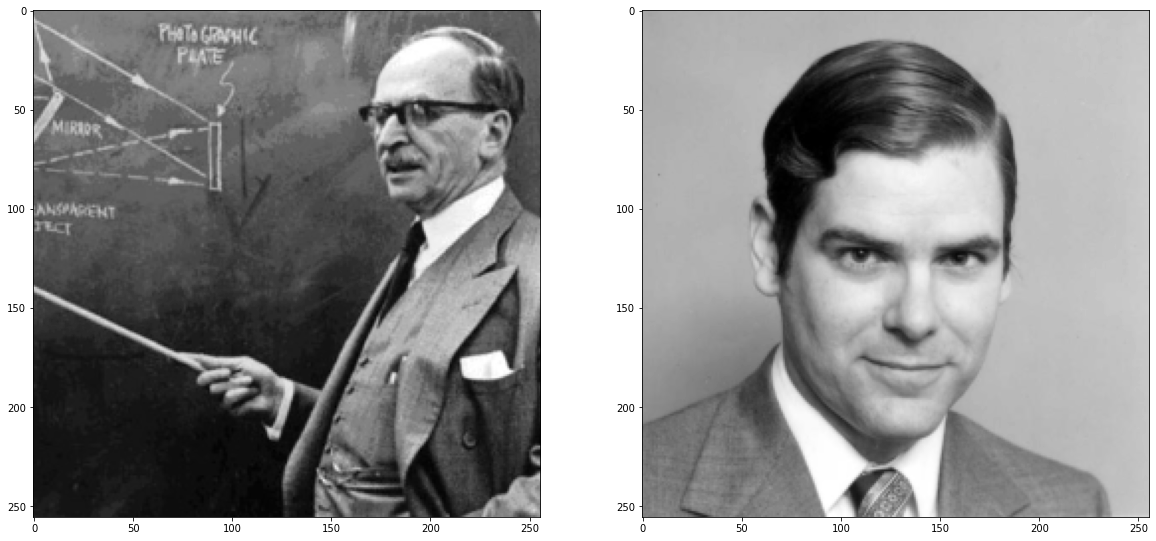

In [44]:
plt.subplot(1,2,1)
plt.imshow(gabor, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(fienup, cmap='gray')

## fourier transform of the images

In [52]:
gaborft=np.fft.fftshift(np.fft.fft2(gabor-np.mean(gabor)))
fienupft=np.fft.fftshift(np.fft.fft2(fienup-np.mean(fienup)))

Text(0.5, 1.0, 'phase fienup')

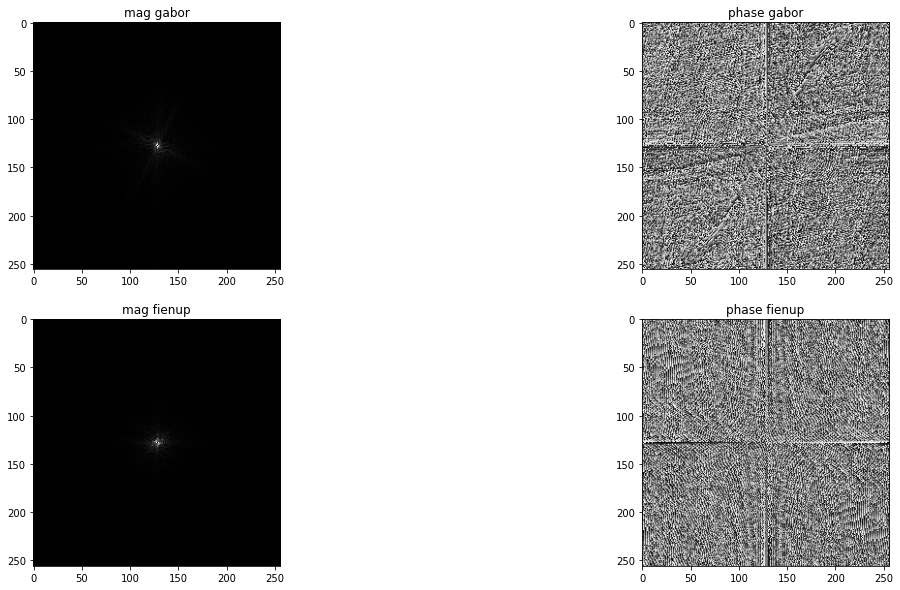

In [53]:
plt.subplot(2,2,1)
plt.imshow(np.abs(gaborft), cmap='gray')
plt.title('mag gabor')
plt.subplot(2,2,2)
plt.imshow(np.angle(gaborft), cmap='gray')
plt.title('phase gabor')
plt.subplot(2,2,3)
plt.imshow(np.abs(fienupft), cmap='gray')
plt.title('mag fienup')
plt.subplot(2,2,4)
plt.imshow(np.angle(fienupft), cmap='gray')
plt.title('phase fienup')

## reconstruction with the phase swapped

Text(0.5, 1.0, 'mag fienup phase gabor')

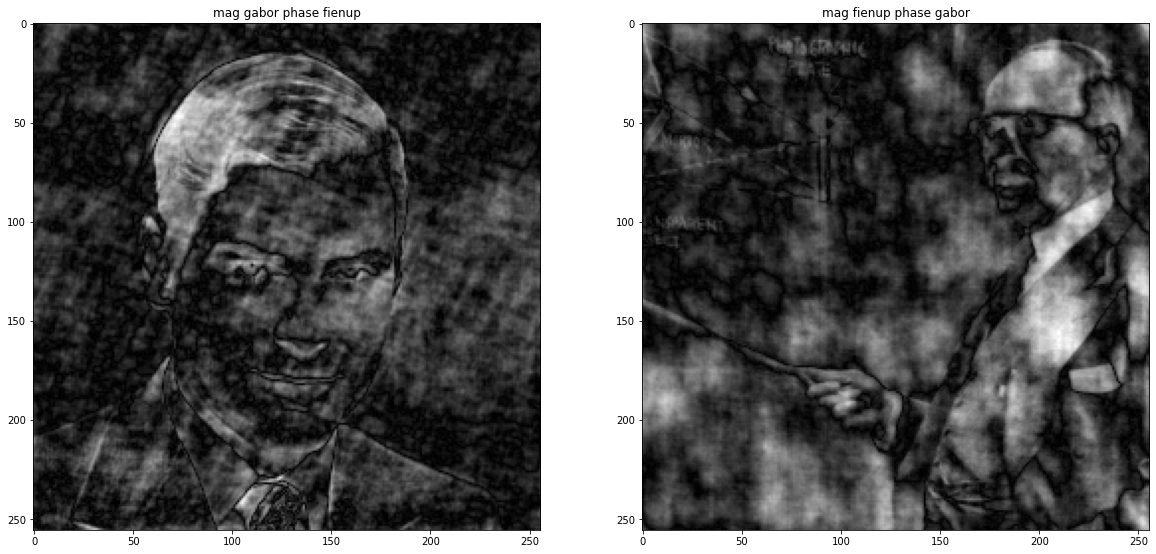

In [63]:
gaborfien=np.abs(gaborft)*np.exp(1j*np.angle(fienupft))
gaborfien=np.fft.ifft2(gaborfien)
fiengabor=np.abs(fienupft)*np.exp(1j*np.angle(gaborft))
fiengabor=np.fft.ifft2(fiengabor)
plt.subplot(1,2,1)
plt.imshow(np.abs(gaborfien), cmap='gray')
plt.title('mag gabor phase fienup')
plt.subplot(1,2,2)
plt.imshow(np.abs(fiengabor), cmap='gray')
plt.title('mag fienup phase gabor')